In [3]:
import pandas as pd
from sklearn import datasets
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
x = df.loc[:, ["petal length (cm)", "petal width (cm)"]]
x_train, x_test, y_train, y_test = train_test_split(x, iris.target, test_size=0.25, random_state=0)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [4]:
from quri_parts.qulacs.sampler import create_qulacs_vector_sampler

from scikit_quri.circuit import create_ibm_embedding_circuit
from scikit_quri.qsvm import QSVC

n_qubit = 4
circuit = create_ibm_embedding_circuit(n_qubit)
# samplerはQulacsのsimulatorやoqtopus_samplerなどを指定可能
sampler = create_qulacs_vector_sampler()
# sampler = create_oqtopus_sampler("qulacs")
qsvm = QSVC(circuit)
qsvm.fit(x_train, y_train, sampler, n_shots=1024)

 111/112
(112, 112)
fitting SVC...
[LibSVM]*
optimization finished, #iter = 41
obj = -3.085217, rho = 0.643803
nSV = 14, nBSV = 2
*
optimization finished, #iter = 51
obj = -3.797547, rho = 0.868752
nSV = 17, nBSV = 2
*.*
optimization finished, #iter = 84
obj = -20.889915, rho = 0.536153
nSV = 40, nBSV = 19
Total nSV = 51


In [5]:
y_pred = qsvm.predict(x_test)

 37/38


y_pred=array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0, 2])
y_test=array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])
f1_score=0.9218568492538648


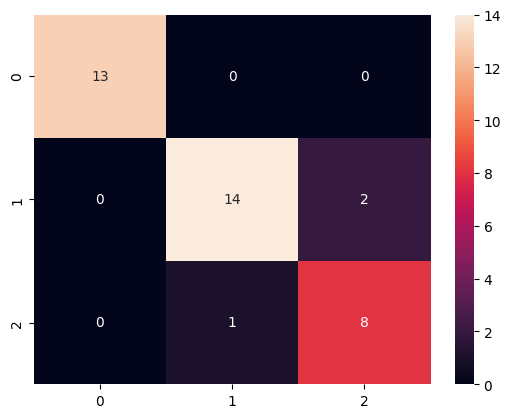

In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(f"{y_pred=}")
print(f"{y_test=}")

print(f"f1_score={f1_score(y_test, y_pred, average='weighted')}")